In [7]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib as pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
import seaborn as sns
%matplotlib inline

In [2]:
# to see all the comands result in a single kernal 
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [57]:
#Upload data
train = pd.read_csv(r'data//train.csv')
test = pd.read_csv(r'data//test.csv')

train.shape
test.shape

(381109, 12)

(127037, 11)

In [58]:
train['Response'].value_counts()/len(train)
train['Gender'].value_counts()
train['Vehicle_Age'].value_counts()
train['Vehicle_Damage'].value_counts()

0    0.877437
1    0.122563
Name: Response, dtype: float64

Male      206089
Female    175020
Name: Gender, dtype: int64

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [59]:
#converting onject to int type
train['Vehicle_Age']=train['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
train['Vehicle_Damage']=train['Vehicle_Damage'].replace({'Yes':1,'No':0})
test['Vehicle_Age']=test['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Gender']=test['Gender'].replace({'Male':1,'Female':0})
test['Vehicle_Damage']=test['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [60]:
sc = StandardScaler()
col = 'Age'
train[col] = sc.fit_transform(train[col].values.reshape(-1,1))
test[col] = sc.transform(test[col].values.reshape(-1,1))

sc = StandardScaler()
col = 'Annual_Premium'
train[col] = sc.fit_transform(train[col].values.reshape(-1,1))
test[col] = sc.transform(test[col].values.reshape(-1,1))

mms = MinMaxScaler()
col = 'Policy_Sales_Channel'
train[col] = sc.fit_transform(train[col].values.reshape(-1,1))
test[col] = sc.transform(test[col].values.reshape(-1,1))

sc = StandardScaler()
col = 'Policy_Sales_Channel'
train[col] = sc.fit_transform(train[col].values.reshape(-1,1))
test[col] = sc.transform(test[col].values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
col_1=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [62]:
# categorical column 
cat_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

In [63]:
train[col_1].head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,0.333777,1,28.0,0,2,1,0.574539,-1.587234,217
1,1,2.396751,1,3.0,0,1,0,0.172636,-1.587234,183
2,1,0.527181,1,28.0,0,2,1,0.449053,-1.587234,27
3,1,-1.148985,1,11.0,1,0,0,-0.113018,0.737321,203
4,0,-0.633242,1,41.0,1,0,0,-0.178259,0.737321,39


In [64]:
X=train[col_1]
y=train['Response']

In [65]:
len(test)/(len(test)+len(train))

0.2500009839691742

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
X_t, X_tt, y_t, y_tt = train_test_split(X, y, test_size=.25, random_state=2)

In [67]:
from lightgbm import LGBMClassifier
lgbcl = LGBMClassifier(n_estimators=52)
lgbcl= lgbcl.fit(X_t, y_t,eval_metric='auc',eval_set=(X_tt , y_tt),verbose=2,categorical_feature=cat_col)
y_lgb = lgbcl.predict(X_tt)
probs_tr = lgbcl.predict_proba(X_t)[:, 1]
probs_te = lgbcl.predict_proba(X_tt)[:, 1]
roc_auc_score(y_t, probs_tr)
roc_auc_score(y_tt, probs_te)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Driving_License', 'Gender', 'Previously_Insured', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[2]	valid_0's auc: 0.852151	valid_0's binary_logloss: 0.337481
[4]	valid_0's auc: 0.853704	valid_0's binary_logloss: 0.318146
[6]	valid_0's auc: 0.854588	valid_0's binary_logloss: 0.304696
[8]	valid_0's auc: 0.85487	valid_0's binary_logloss: 0.295056
[10]	valid_0's auc: 0.855253	valid_0's binary_logloss: 0.287852
[12]	valid_0's auc: 0.855998	valid_0's binary_logloss: 0.282192
[14]	valid_0's auc: 0.856366	valid_0's binary_logloss: 0.27789
[16]	valid_0's auc: 0.856867	valid_0's binary_logloss: 0.274479
[18]	valid_0's auc: 0.857196	valid_0's binary_logloss: 0.271813
[20]	valid_0's auc: 0.857469	valid_0's binary_logloss: 0.269721
[22]	valid_0's auc: 0.857762	valid_0's binary_logloss: 0.268018
[24]	valid_0's auc: 0.857984	valid_0's binary_logloss: 0.26665
[26]	valid_0's auc: 0.858135	valid_0's binary_logloss: 0.265558
[28]	valid_0's auc: 0.858339	valid_0's binary_logloss: 0.264652
[30]	valid_0's auc: 0.858476	valid_0's binary_logloss: 0.263888
[32]	valid_0's auc: 0.858635	valid_0's binary_l

0.8635482154104706

0.8589628579465312

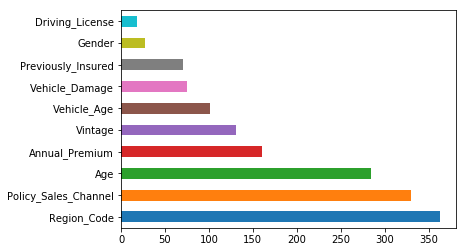

In [68]:
feat_importances = pd.Series(lgbcl.feature_importances_, index=X_t.columns)
feat_importances.nlargest(15).plot(kind='barh')
#feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

In [69]:
lgbcl= lgbcl.fit(X, y)
lgb_pred= lgbcl.predict_proba(test[col_1])[:, 1]
sample_submmission['Response']=lgb_pred

In [70]:
sample_submmission.head()

,id,Response
0,381110,0.001042
1,381111,0.289179
2,381112,0.295323
3,381113,0.007601
4,381114,0.001042


In [71]:
sample_submmission.to_csv("data/lgb_19_sept_trial_2.csv", index = False)